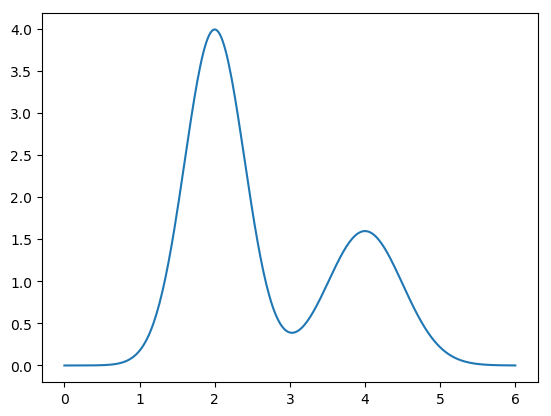

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1a69aadd8>

In [1]:
using PyCall
include("src/gauss_error.jl")
include("src/kernels.jl")

a = 0.
b = 6.

function phi(x::Float64)
    mu1 = 2.
    mu2 = 4.
    n1 = 4.
    n2 = 2.
    sig1 = 0.4
    sig2 = 0.5

    norm(n, mu, sig, x) = n / sqrt(2 * pi*sig^2) * exp(-(x - mu)^2 / (2 * sig^2))
    return norm(n1, mu1, sig1, x) + norm(n2, mu2, sig2, x)
end

# function phi(x::Float64)
#     return cos(x)
# end

x = collect(range(a, stop=b, length=300))

using PyPlot
myplot = plot(x, phi.(x))

In [2]:
function kernel(x::Float64, y::Float64)
    return getOpticsKernels("triangular")(x, y)
end

kernel (generic function with 1 method)

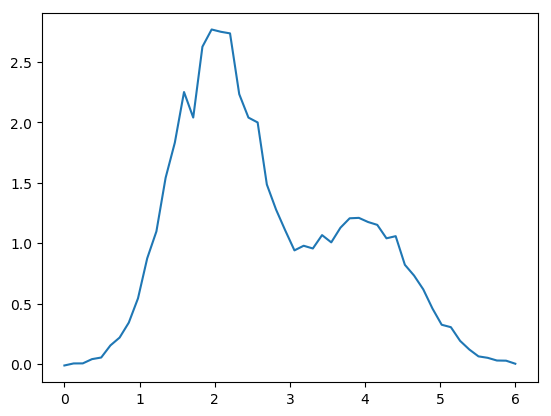

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1a6bb6160>

In [3]:
convolution = y -> quadgk(x -> kernel(x,y) * phi(x), a, b, maxevals=10^7)[1]
y = collect(range(a, stop = b, length=50))
ftrue = convolution.(y)
sig = 0.05*abs.(ftrue) +[0.01 for i = 1:Base.length(ftrue)]
using Compat, Random, Distributions
noise = []
for sigma in sig
    n = rand(Normal(0., sigma), 1)[1]
    push!(noise, n)
end
f = ftrue + noise
plot(y, f)

In [4]:
basis = FourierBasis(a, b, 25)

FourierBasis(0.0, 6.0, 25, BaseFunction[BaseFunction(##38#42(), (0.0, 6.0)), BaseFunction(##39#43{Float64,Float64,Int64}(3.0, 3.0, 1), (0.0, 6.0)), BaseFunction(##40#44{Float64,Float64,Int64}(3.0, 3.0, 1), (0.0, 6.0)), BaseFunction(##39#43{Float64,Float64,Int64}(3.0, 3.0, 2), (0.0, 6.0)), BaseFunction(##40#44{Float64,Float64,Int64}(3.0, 3.0, 2), (0.0, 6.0)), BaseFunction(##39#43{Float64,Float64,Int64}(3.0, 3.0, 3), (0.0, 6.0)), BaseFunction(##40#44{Float64,Float64,Int64}(3.0, 3.0, 3), (0.0, 6.0)), BaseFunction(##39#43{Float64,Float64,Int64}(3.0, 3.0, 4), (0.0, 6.0)), BaseFunction(##40#44{Float64,Float64,Int64}(3.0, 3.0, 4), (0.0, 6.0)), BaseFunction(##39#43{Float64,Float64,Int64}(3.0, 3.0, 5), (0.0, 6.0))  …  BaseFunction(##39#43{Float64,Float64,Int64}(3.0, 3.0, 21), (0.0, 6.0)), BaseFunction(##40#44{Float64,Float64,Int64}(3.0, 3.0, 21), (0.0, 6.0)), BaseFunction(##39#43{Float64,Float64,Int64}(3.0, 3.0, 22), (0.0, 6.0)), BaseFunction(##40#44{Float64,Float64,Int64}(3.0, 3.0, 22), (0.0, 

In [5]:
# @time discretize_kernel(basis, kernel, y)

Kmn = discretize_kernel(basis, kernel, y)

50×51 Array{Float64,2}:
 0.250001  -0.455947   -0.16521    0.341958   …  -0.000729514  -0.0369338  
 0.307476  -0.545703   -0.229673   0.373398       0.0037239    -0.0346407  
 0.357456  -0.611526   -0.304106   0.365501      -0.000873095  -0.0278694  
 0.399935  -0.652334   -0.385436   0.318785       0.00384864   -0.0249873  
 0.434922  -0.667458   -0.470331   0.236305      -0.000978522  -0.0188212  
 0.462411  -0.656641   -0.555503   0.123459   …   0.00393409   -0.0153206  
 0.482401  -0.620082   -0.63763   -0.0123768     -0.00104332   -0.00978408 
 0.494901  -0.558367   -0.713458  -0.162314       0.00397899   -0.00564557 
 0.499892  -0.472505   -0.779792  -0.316543      -0.00106802   -0.000752764
 0.499998  -0.369117   -0.833841  -0.459794       0.00122387    0.000795912
 0.5       -0.259458   -0.874202  -0.573184   …  -0.00116868   -0.000873727
 0.499999  -0.145537   -0.900201  -0.648248       0.00110874    0.000946394
 0.499993  -0.0292275  -0.911425  -0.682509      -0.0010468    -

In [6]:
model = model = GaussErrorMatrixUnfolder(omega(basis, 2))

GaussErrorMatrixUnfolder(Array{Float64,2}[[0.0 0.0 … 0.0 0.0; 0.0 1.80387 … 0.0 0.0; … ; 0.0 0.0 … 7.04638e5 0.0; 0.0 0.0 … 0.0 7.04638e5]], 51, "EmpiricalBayes", nothing)

starting solve
ending solve
starting solve_correct
starting optimal_alpha
starting optimize
Iter     Function value   Gradient norm 
     0    -7.731441e+02     1.541164e+01
     1    -7.798226e+02     7.745747e+00
     2    -7.920667e+02     2.094657e+00
     3    -7.925357e+02     1.899333e-01
     4    -7.925392e+02     1.524523e-04
     5    -7.925392e+02     0.000000e+00


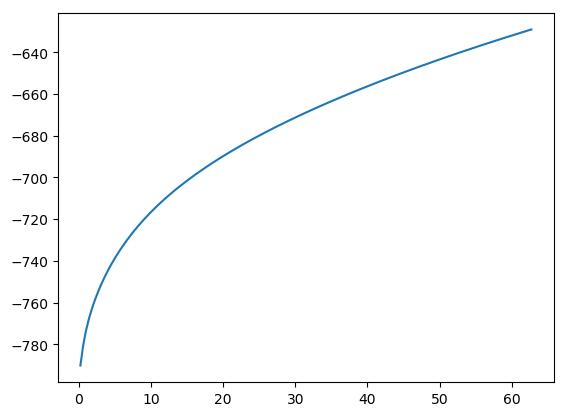

ending solve_correct


Dict{String,Array{Float64,N} where N} with 3 entries:
  "alphas" => [0.0820741]
  "coeff"  => [1.97018, 0.899697, -0.528991, -0.599609, -0.445274, -0.634507, -…
  "sig"    => [0.00513816 0.00155371 … -1.93727e-8 -4.63538e-9; 0.00155371 0.00…

In [7]:
# @time solve(model, Kmn, f, sig)

result = solve(model, Kmn, f, sig)

In [8]:
phivec = PhiVec(result["coeff"], basis, result["sig"])

PhiVec([1.97018, 0.899697, -0.528991, -0.599609, -0.445274, -0.634507, -0.00391153, -0.0441014, 0.0757266, 0.00188453  …  3.84569e-7, -4.91581e-6, -4.91737e-7, 3.81056e-6, 3.51017e-7, -3.36186e-6, -3.3145e-7, 2.61188e-6, 5.87883e-7, -2.15213e-6], FourierBasis(0.0, 6.0, 25, BaseFunction[BaseFunction(##38#42(), (0.0, 6.0)), BaseFunction(##39#43{Float64,Float64,Int64}(3.0, 3.0, 1), (0.0, 6.0)), BaseFunction(##40#44{Float64,Float64,Int64}(3.0, 3.0, 1), (0.0, 6.0)), BaseFunction(##39#43{Float64,Float64,Int64}(3.0, 3.0, 2), (0.0, 6.0)), BaseFunction(##40#44{Float64,Float64,Int64}(3.0, 3.0, 2), (0.0, 6.0)), BaseFunction(##39#43{Float64,Float64,Int64}(3.0, 3.0, 3), (0.0, 6.0)), BaseFunction(##40#44{Float64,Float64,Int64}(3.0, 3.0, 3), (0.0, 6.0)), BaseFunction(##39#43{Float64,Float64,Int64}(3.0, 3.0, 4), (0.0, 6.0)), BaseFunction(##40#44{Float64,Float64,Int64}(3.0, 3.0, 4), (0.0, 6.0)), BaseFunction(##39#43{Float64,Float64,Int64}(3.0, 3.0, 5), (0.0, 6.0))  …  BaseFunction(##39#43{Float64,Float

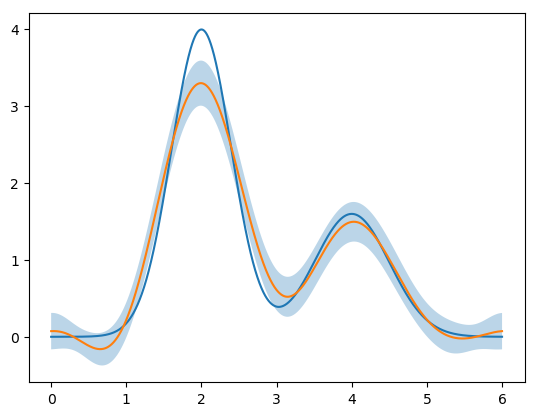

In [9]:
x = collect(range(a, stop=b, length=5000))
plot(x, phi.(x))

phi_reconstructed = call(phivec, x)
phi_reconstructed_errors = errors(phivec, x)

plot(x, call(phivec, x))
fill_between(x, phi_reconstructed - phi_reconstructed_errors, phi_reconstructed + phi_reconstructed_errors, alpha=0.3);

In [10]:
A = [1 2 3; 4 1 6; 7 8 1]
det(A)

104.0